What is sentiment analysis?
Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing that identifies the emotional tone behind a body of text. This is a popular way for organizations to determine and categorize opinions about a product, service, or idea. It involves the use of data mining, machine learning and artificial intelligence to mine text for sentiment and subjective information.

Sentiment analysis systems help organizations gather insights from unorganized and unstructured text that comes from online sources such as emails, blog posts, support tickets, web chats, social media channels, forums and comments. Algorithms replace manual data processing by implementing rule-based, automatic or hybrid methods. Rule-based systems perform sentiment analysis based on predefined, lexicon-based rules while automatic systems learn from data with machine learning techniques. A hybrid sentiment analysis combines both approaches.

In addition to identifying sentiment, opinion mining can extract the polarity (or the amount of positivity and negativity), subject and opinion holder within the text. Furthermore, sentiment analysis can be applied to varying scopes such as document, paragraph, sentence and sub-sentence levels.

Types of sentiment analysis
Fine-grained sentiment analysis provides a more precise level of polarity by breaking it down into further categories, usually very positive to very negative. This can be considered the opinion equivalent of ratings on a 5-star scale. Emotion detection identifies specific emotions rather than positivity and negativity. Examples could include happiness, frustration, shock, anger and sadness. Intent-based analysis recognizes actions behind a text in addition to opinion. For example, an online comment expressing frustration about changing a battery could prompt customer service to reach out to resolve that specific issue. Aspect-based analysis gathers the specific component being positively or negatively mentioned. For example, a customer might leave a review on a product saying the battery life was too short. Then, the system will return that the negative sentiment is not about the product as a whole, but about the battery life.

IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn import model_selection, preprocessing, linear_model, metrics 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn import ensemble 
from lightgbm import LGBMClassifier 
from sklearn.metrics import roc_auc_score, roc_curve 
from xgboost import XGBClassifier 

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords 
from textblob import Word 
nltk.download('wordnet')


from termcolor import colored 
from warnings import filterwarnings 
filterwarnings('ignore')

from sklearn import set_config 
set_config(print_changed_only = False)

print(colored("\nALL LIBRARIES WERE SUCCESSFULLY IMPORTED", "green"))


ALL LIBRARIES WERE SUCCESSFULLY IMPORTED


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guddu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\guddu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LOAD DATASETS

In [2]:
train_set = pd.read_csv("C://Users/guddu/HateSpeech_Sentiment_analysis/DATA/train.csv", encoding = "utf-8", engine = "python", header = 0)
test_set = pd.read_csv("C://Users/guddu/HateSpeech_Sentiment_analysis/DATA/test.csv", encoding = "utf-8", engine = "python", header = 0)

print(colored("\nDATASETS WERE SUCCESSFULLY LOADED", "green"))


DATASETS WERE SUCCESSFULLY LOADED


In [3]:
train_set.head(n = 10).style.background_gradient(cmap = "summer")

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [4]:
test_set.head(n = 10).style.background_gradient(cmap = "summer")

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes ness #smokeyeyes #tired #lonely #sof #grungeâ¦
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!!
8,31971,@user @user @user i will never understand why my dad left me when i was so young.... :/ #deep #inthefeels
9,31972,#delicious #food #lovelife #capetown mannaepicure #resturantâ¦


In [5]:
train_set.shape, test_set.shape

((31962, 3), (17197, 2))

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
train_set.duplicated().sum()

0

In [8]:
train_set.groupby("label").count().style.background_gradient(cmap = "summer")

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [9]:
train_set["tweet"] = train_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_set["tweet"] = test_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

print(colored("\nCONVERTED SUCCESSFULLY", "green"))


CONVERTED SUCCESSFULLY


In [10]:
train_set["tweet"] = train_set["tweet"].str.replace('[^\w\s]', '')
test_set["tweet"] = test_set["tweet"].str.replace('[^\w\s]', '')

print(colored("\nDELETED SUCCESSFULLY", "green"))


DELETED SUCCESSFULLY


In [11]:
train_set['tweet'] = train_set['tweet'].str.replace('\d', '')
test_set['tweet'] = test_set['tweet'].str.replace('\d', '')

print(colored("\nNUMBERS DELETED SUCCESSFULLY", "green"))


NUMBERS DELETED SUCCESSFULLY


In [12]:
sw = stopwords.words("english")
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
test_set['tweet'] = test_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

print(colored("\nSTOPWORDS DELETED SUCCESSFULLY", "green"))


STOPWORDS DELETED SUCCESSFULLY


In [13]:
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test_set['tweet'] = test_set['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print(colored("\nLEMMATIZATION COMPLETED", "green"))


LEMMATIZATION COMPLETED


In [14]:
train_set = train_set.drop("id", axis = 1)
test_set = test_set.drop("id", axis = 1)

print(colored("\nID COLUMNS HAVE BEEN DROPPED", "green"))


ID COLUMNS HAVE BEEN DROPPED


In [15]:
train_set.head(n = 10)

,label,tweet
0,0,user father dysfunctional selfish drag kid dys...
1,0,user user thanks lyft credit cant use cause do...
2,0,bihday majesty
3,0,model love u take u time urð ðððð ððð
4,0,factsguide society motivation
5,0,huge fan fare big talking leave chaos pay disp...
6,0,user camping tomorrow user user user user user...
7,0,next school year year examsð cant think ð scho...
8,0,love land allin cavs champion cleveland clevel...
9,0,user user welcome im gr


In [16]:
test_set.head(n = 10)

,tweet
0,studiolife aislife requires passion dedication...
1,user white supremacist want everyone see new â...
2,safe way heal acne altwaystoheal healthy healing
3,hp cursed child book reservation already yes ð...
4,rd bihday amazing hilarious nephew eli ahmir u...
5,choose momtips
6,something inside dy ððâ eye ness smokeyeyes ti...
7,finishedtattooinkedinkloveitâï âïâïâïâï thanks...
8,user user user never understand dad left young...
9,delicious food lovelife capetown mannaepicure ...


In [18]:
x = train_set["tweet"]
y = train_set["label"]

train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size = 0.25, shuffle = True, random_state = 11)

print(colored("\nDIVIDED SUCCESSFULLY", "green"))


DIVIDED SUCCESSFULLY


VECTORIZE DATA 

"COUNT VECTORS" METHOD

In [19]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

"TF-IDF" METHOD

In [20]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

BUILD MACHINE LEARNING MODELS

LOGISTIC REGRESSION MODEL WITH "COUNT-VECTORS" METHOD

In [21]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(log_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 20).mean()

print("\nLogistic regression model with 'count-vectors' method")
print("Accuracy ratio:", accuracy)


Logistic regression model with 'count-vectors' method
Accuracy ratio: 0.9463148496240601


LOGISTIC REGRESSION MODEL WITH "TF-IDF" METHOD

In [22]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, train_y)
accuracy = model_selection.cross_val_score(log_model, 
                                           x_test_tf_idf_word,  
                                           test_y, 
                                           cv = 20).mean()

print("\nLogistic regression model with 'tf-idf' method")
print("Accuracy ratio:", accuracy)


Logistic regression model with 'tf-idf' method
Accuracy ratio: 0.9353026315789474


XGBOOST MODEL WITH "COUNT-VECTORS" METHOD

In [23]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 20).mean()

print("\nXGBoost model with 'count-vectors' methos")
print("Accuracy ratio:", accuracy)


XGBoost model with 'count-vectors' methos
Accuracy ratio: 0.9444389097744361


XGBOOST MODEL WITH 'TF-IDF'METHOD

In [24]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word, train_y) 
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_word, 
                                           test_y,
                                           cv = 20).mean()

print("\nXGBoost model with 'tf-idf' method")
print("Accuracy ratio:", accuracy)


XGBoost model with 'tf-idf' method
Accuracy ratio: 0.9410592105263158


LIGHT GBM MODEL WITH 'COUNT-VECTORS' METHOD

In [25]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_count.astype("float64"), train_y)
accuracy = model_selection.cross_val_score(lgbm_model, 
                                           x_test_count.astype("float64"), 
                                           test_y, 
                                           cv = 20).mean()

print("\nLight GBM model with 'count-vectors' method")
print("Accuracy ratio:", accuracy)


Light GBM model with 'count-vectors' method
Accuracy ratio: 0.940809837092732


LIGHT GBM MODEL WITH 'TF-IDF' METHOD

In [26]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_tf_idf_word, train_y)
accuracy = model_selection.cross_val_score(lgbm_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 20).mean()

print("\nLight GBM model with 'tf-idf' method")
print("Accuracy ratio:", accuracy)


Light GBM model with 'tf-idf' method
Accuracy ratio: 0.9403079573934837


ROC-AUC

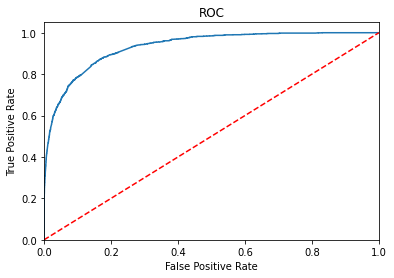

In [27]:
y = train_y 
X = x_train_count.astype("float64")

logit_roc_auc = roc_auc_score(y, lgbm_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, lgbm_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

ESTIMATION OVER TEST SET

In [28]:
test_set.head()

,tweet
0,studiolife aislife requires passion dedication...
1,user white supremacist want everyone see new â...
2,safe way heal acne altwaystoheal healthy healing
3,hp cursed child book reservation already yes ð...
4,rd bihday amazing hilarious nephew eli ahmir u...


In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
test_set = vectorizer.transform(test_set["tweet"])
test_set.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
lgbm_model.predict(test_set.astype("float"))[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

VISUALIZATION WITH WORD CLOUD

<function matplotlib.pyplot.show(close=None, block=None)>

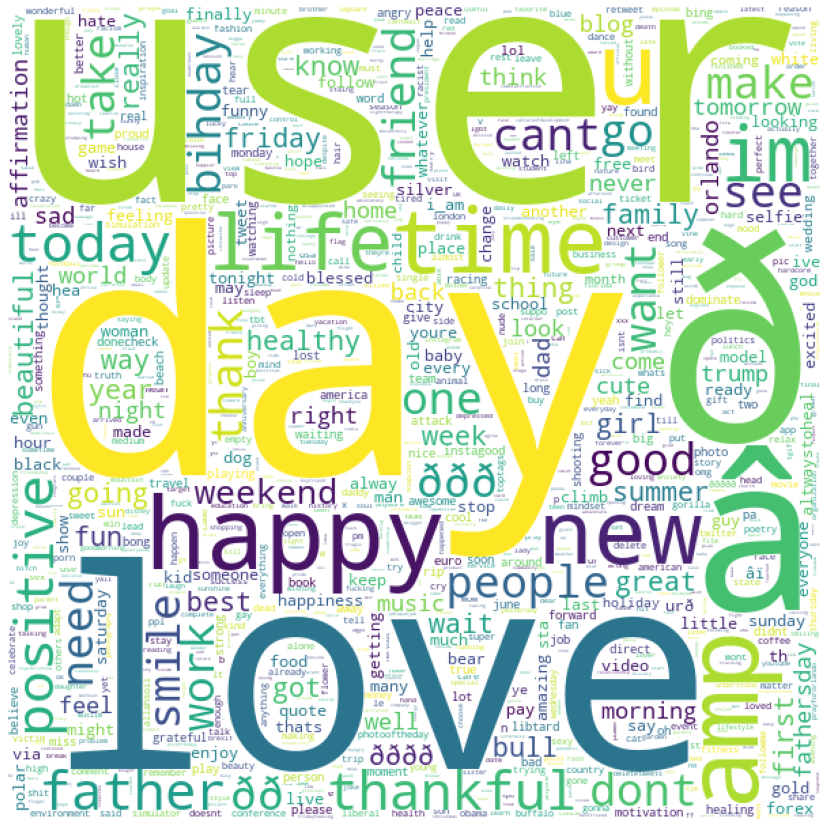

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 

text = " ".join(i for i in train_set.tweet)

wc = WordCloud(background_color = "white", 
               width = 600, 
               height = 600, 
               contour_width = 0, 
               contour_color = "red", 
               max_words = 1000, 
               scale = 1, 
               collocations = False, 
               repeat = True, 
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize=[15,15])
plt.imshow(wc)
plt.axis("off")
plt.show
